In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_blobs, make_circles, make_classification
from sklearn.metrics import accuracy_score, confusion_matrix, mean_absolute_error
import time

1. Создайте однослойный перцептрон с 1, 2, 10 и 100 нейронами. Сравние их точность и сделайте вывод о достаточном количестве нейронов.

In [3]:
blob_centers = ([1, 1], [3, 4], [1, 3.3], [3.5, 1.8])
X, y = make_blobs(n_samples=200, 
                          centers=blob_centers, 
                          cluster_std=0.5,
                          random_state=0)

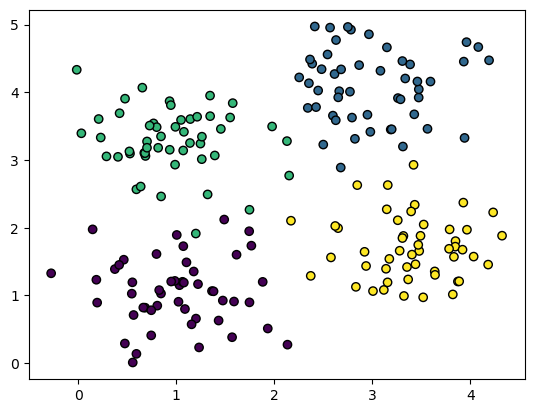

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=y,  edgecolors='black',linewidth=1)

In [7]:
def plot_classification(X, y, model):
    X0 = np.linspace(X[:, 0].min()-1,X[:, 0].max()+1, X.shape[0])
    X1 = np.linspace(X[:, 1].min()-1,X[:, 1].max()+1, X.shape[0])
    X0_grid, X1_grid = np.meshgrid(X0, X1)

    y_predict = model.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
    plt.pcolormesh(X0_grid, X1_grid, y_predict)

    plt.scatter(X[:, 0], X[:, 1], c=y,  edgecolors='black',linewidth=1)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()

Доля правильных ответов: 0.245
Матрица классификации для одностойного перцептрона с 1 нейронами :
[[ 0  0 50  0]
 [ 0  0 50  0]
 [ 1  0 49  0]
 [ 0  0 50  0]]


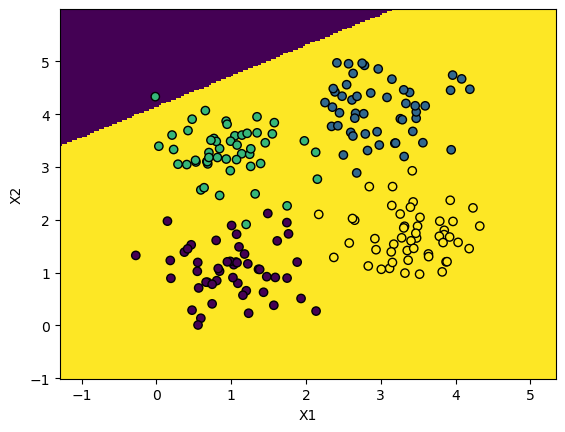

Доля правильных ответов: 0.610
Матрица классификации для одностойного перцептрона с 2 нейронами :
[[ 4  4 42  0]
 [ 0 26  0 24]
 [ 2  2 46  0]
 [ 0  4  0 46]]


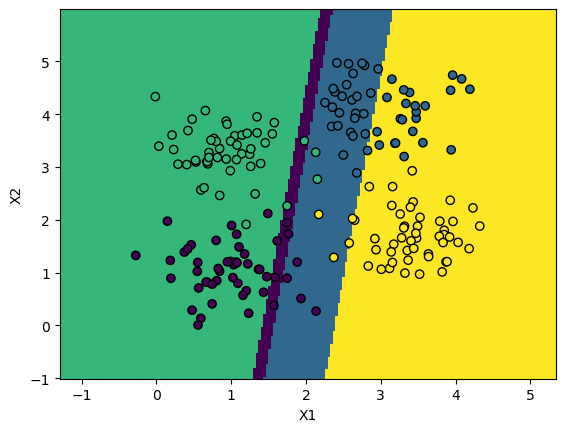

Доля правильных ответов: 0.985
Матрица классификации для одностойного перцептрона с 10 нейронами :
[[50  0  0  0]
 [ 0 50  0  0]
 [ 1  2 47  0]
 [ 0  0  0 50]]


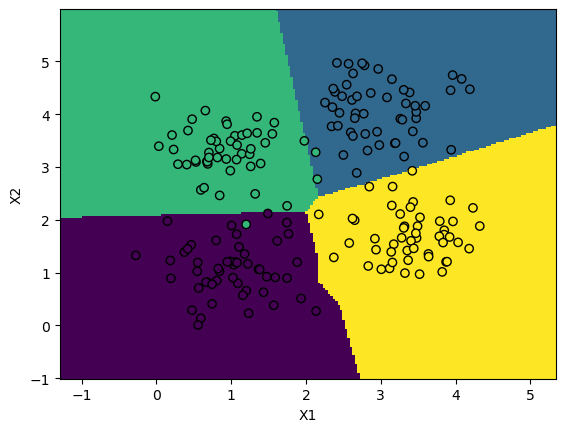

Доля правильных ответов: 0.985
Матрица классификации для одностойного перцептрона с 100 нейронами :
[[50  0  0  0]
 [ 0 50  0  0]
 [ 1  2 47  0]
 [ 0  0  0 50]]


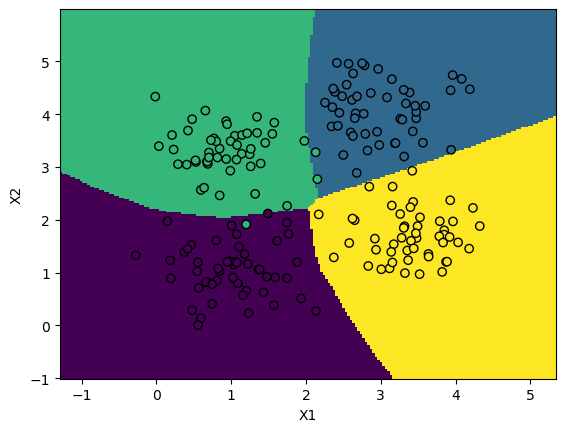

In [8]:
neurons = [1, 2, 10, 100]
times_1 = []

for neuron in neurons:
    start = time.perf_counter()
    clf_pers = MLPClassifier(hidden_layer_sizes=(neuron,), max_iter=3000, random_state=1).fit(X, y)
    time_res_1 = round(time.perf_counter() - start, 3)
    
    y_pred_clf_pers = clf_pers.predict(X)
    
    times_1.append(time_res_1)
    
    print(f'Доля правильных ответов: {accuracy_score(y, y_pred_clf_pers):.3f}')
    print(f'Матрица классификации для одностойного перцептрона с {neuron} нейронами :')
    print(confusion_matrix(y, y_pred_clf_pers))
    plot_classification(X, y, clf_pers)

Вывод: Чем больше количесвто нейровнов в скрытом слое, тем больше правильно предсказанных значений, что свидетельстует о увеличении точности обучения.

2. Создайте и оцените модель с двумя, тремя и десятью скрытыми слоями с одинаковым количеством нейронов. Сравните их точность и сделайте вывод о достаточном количестве слоев.

Доля правильных ответов: 0.990
Матрица классификации для 2-слойного перцептрона:
[[50  0  0  0]
 [ 0 50  0  0]
 [ 1  1 48  0]
 [ 0  0  0 50]]


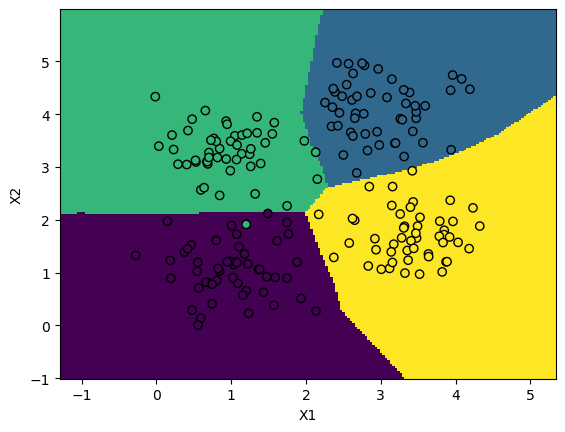

Доля правильных ответов: 0.995
Матрица классификации для 3-слойного перцептрона:
[[50  0  0  0]
 [ 0 50  0  0]
 [ 1  0 49  0]
 [ 0  0  0 50]]


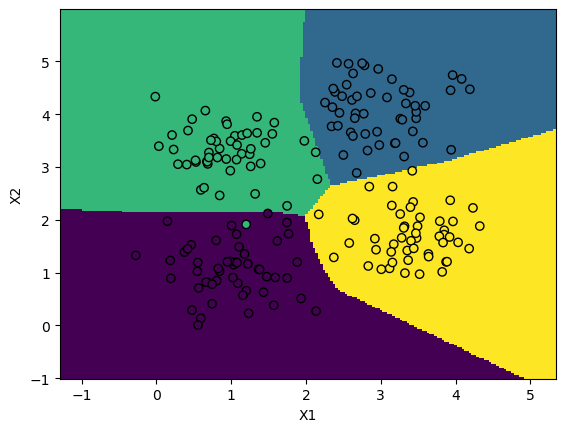

Доля правильных ответов: 1.000
Матрица классификации для 10-слойного перцептрона:
[[50  0  0  0]
 [ 0 50  0  0]
 [ 0  0 50  0]
 [ 0  0  0 50]]


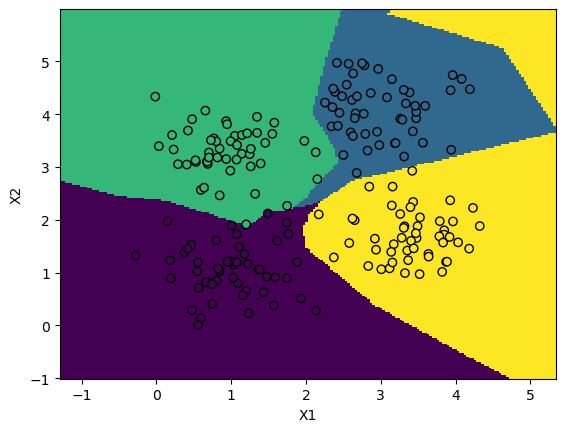

In [9]:
times_2 = []
models = {'2 скрытых слоя':MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=10_000, random_state=1),
         '3 скрытых слоя':MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=10_000, random_state=1), 
         '10 скрытых слоя':MLPClassifier(hidden_layer_sizes=(10, 10, 10, 10, 10, 10, 10, 10, 10, 10),
                                         max_iter=10000, random_state=1)}

for model in models.values():
    start = time.perf_counter()
    model.fit(X, y)
    time_res_2 = round(time.perf_counter() - start, 3)
    
    y_pred = model.predict(X)
    
    times_2.append(time_res_2)
    
    print(f'Доля правильных ответов: {accuracy_score(y, y_pred):.3f}')
    print(f'Матрица классификации для {len(model.hidden_layer_sizes)}-слойного перцептрона:')
    print(confusion_matrix(y, y_pred))
    plot_classification(X, y, model)

Вывод: Чем больше скрытых слоев в перцептроне, тем точнее предсказание модели.

3. Для глубокой модели выведите веса всех нейронов на всех слоях. Выведите значения векторов весов смещения.

In [58]:
clf_pers_4 = MLPClassifier(hidden_layer_sizes=(4, 4, 4, 4),
                                         max_iter=10000, random_state=1).fit(X, y)

print('Веса между входными значениями и 1 скрытым слоем:')
print(clf_pers_4.coefs_[0], end='\n')
print()

for i in range(1, len(clf_pers_4.coefs_)-1):
    print(f'Веса между {i} и {i+1} скрытыми слоями:')
    print(clf_pers_4.coefs_[i], end='\n')
    print()
    
print('Веса между последнем скрытым слоем и выходными значениями:')
print(clf_pers_4.coefs_[4], end='\n')

Веса между входными значениями и 1 скрытым слоем:
[[-7.16594291e-12  1.76463266e+00 -8.15326799e-02 -1.62479359e-01]
 [-1.24319755e-02 -1.74532555e+00 -5.41284403e-03 -2.10326019e-01]]

Веса между 1 и 2 скрытыми слоями:
[[-9.80482080e-04  7.40153614e-03 -3.02406828e-02  9.95907905e-07]
 [-1.37520970e-13  1.39073066e+00 -5.12084563e-03 -1.19354116e-03]
 [ 1.15238750e-03  2.87212539e-02 -4.01959348e-06  6.26329008e-06]
 [ 7.16282909e-03  1.72148418e+00 -1.38977239e-02 -2.62745789e-02]]

Веса между 2 и 3 скрытыми слоями:
[[ 2.52926819e-02  2.08954140e-27  6.05714955e-06 -3.39795387e-06]
 [ 3.99573268e-06  1.46862828e-01 -3.35751628e-02  1.53140559e+00]
 [ 3.63448786e-02  1.62889916e-04 -3.76611115e-05  8.00458420e-04]
 [-1.03430307e-02 -2.92661564e-21  1.25732054e-02 -1.67592539e-05]]

Веса между 3 и 4 скрытыми слоями:
[[-7.76706237e-04 -8.44214016e-05  5.08518564e-34 -2.18775004e-02]
 [ 7.80028607e-04  9.33552958e-01 -1.02405904e+00  1.07179049e-05]
 [-1.05009947e-02 -4.03703686e-13  7.3

4. Постройте и оцените модель с большим количеством нейронов и слоев. Замерьте время выполнения обучения, сравните со временем обучения более простых моделей.

Доля правильных ответов: 1.000
Матрица классификации для 10-слойного перцептрона:
[[50  0  0  0]
 [ 0 50  0  0]
 [ 0  0 50  0]
 [ 0  0  0 50]]


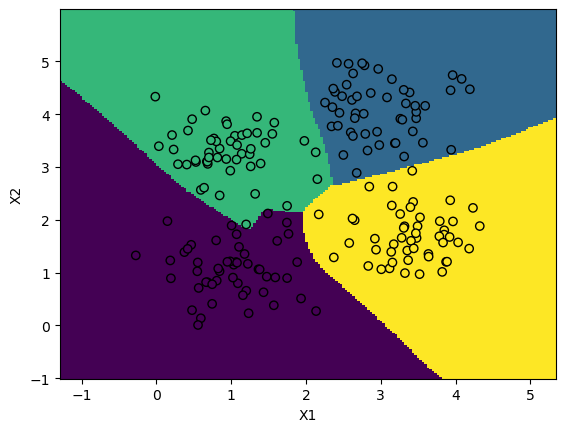

In [10]:
neuron_model = MLPClassifier(hidden_layer_sizes=(100, 100, 100, 100, 100, 100, 100, 100, 100, 100),
                                         max_iter=10_000, random_state=1)

start = time.perf_counter()
neuron_model.fit(X, y)
time_res_4 = round(time.perf_counter() - start, 3)

y_pred_4 = neuron_model.predict(X)

print(f'Доля правильных ответов: {accuracy_score(y, y_pred_4):.3f}')
print('Матрица классификации для 10-слойного перцептрона:')
print(confusion_matrix(y, y_pred_4))
plot_classification(X, y, neuron_model)

In [12]:
from prettytable import PrettyTable

In [13]:
table = PrettyTable(['Модель', 'Время обучения'])
 
table.add_row(['Однослойный перцептрон с 1 нейроном', times_1[0]])
table.add_row(['Однослойный перцептрон с 2 нейронами', times_1[1]])
table.add_row(['Двуслойный перцептрон с 10 нейронами', times_2[0]])
table.add_row(['Десятислойный перцептрон с 100 нейронами', time_res_4])
 
print(table)

+------------------------------------------+----------------+
|                  Модель                  | Время обучения |
+------------------------------------------+----------------+
|   Однослойный перцептрон с 1 нейроном    |     0.053      |
|   Однослойный перцептрон с 2 нейронами   |     0.945      |
|   Двуслойный перцептрон с 10 нейронами   |     0.558      |
| Десятислойный перцептрон с 100 нейронами |     1.126      |
+------------------------------------------+----------------+


5. Постройте и оцените модель классификации с помощью перцептрона на датасете, который вы использовали на контрольной по классификиации (если вы ее не выполняли, возьмите любой датасет из раздела "real world datasets" в библиотеке sklearn).

In [7]:
import sklearn.datasets

In [15]:
data_load = sklearn.datasets.fetch_openml(name='prnn_fglass', version=1)
data_load.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [16]:
data = pd.DataFrame(data=data_load.data, columns=data_load['feature_names']) 
data['Type'] = data_load.target 

In [17]:
from sklearn.preprocessing import OrdinalEncoder # Для кодировки целевой переменной исполльзуем порядковое кодирование

In [18]:
y_for_code = np.array(data['Type']) # Создаем массив с категориальными данными для их изменение

ord_enc = OrdinalEncoder()
data["code"] = ord_enc.fit_transform(y_for_code.reshape(-1, 1))
data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type,code
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,window_float_glass,4.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,window_float_glass,4.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,window_float_glass,4.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,window_float_glass,4.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,window_float_glass,4.0
...,...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,vehicle_headlamp_glass,3.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,vehicle_headlamp_glass,3.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,vehicle_headlamp_glass,3.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,vehicle_headlamp_glass,3.0


In [19]:
y_5 = data['code']
X_5 = data.drop(['Type', 'code'], axis=1)

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit(X_5)
X_scaled = scaler.transform(X_5)

In [24]:
model_pers_5 = MLPClassifier(hidden_layer_sizes=(9, 9, 9), max_iter=10_000, random_state=1)

start = time.perf_counter()
model_pers_5.fit(X_scaled, y_5)
result_time_log = time.perf_counter() - start

y_pred_5 = model_pers_5.predict(X_scaled)


print(f'Время обучения модели: {result_time_log:.6f} sec')
print(f'Доля правильных ответов: {accuracy_score(y_5, y_pred_5):.3f}')
print('Матрица классификации:')
print(confusion_matrix(y_5, y_pred_5))

Время обучения модели: 1.019162 sec
Доля правильных ответов: 0.841
Матрица классификации:
[[11  0  0  0  0  2]
 [ 0  9  0  0  0  0]
 [ 0  0  1  0 11  5]
 [ 1  0  0 27  0  1]
 [ 0  0  0  0 62  8]
 [ 0  0  0  0  6 70]]


6. Постройте и оцените модель регрессии с помощью перцептрона на датасете, который вы использовали на контрольной по регрессии.

In [8]:
esl_data = sklearn.datasets.fetch_openml(name='ESL', version=1)

In [9]:
data = pd.DataFrame(esl_data['data'], columns=esl_data['feature_names']) # Создаем датасет
data['Output'] = esl_data.target  # Добавляем к созданному датасету колонку с целевой переменной
data

,in1,in2,in3,in4,Output
0,6.0,5.0,6.0,6.0,6.0
1,5.0,4.0,5.0,5.0,5.0
2,5.0,3.0,4.0,5.0,4.0
3,6.0,5.0,6.0,7.0,6.0
4,4.0,3.0,3.0,5.0,3.0
...,...,...,...,...,...
483,4.0,3.0,3.0,5.0,3.0
484,6.0,5.0,5.0,6.0,6.0
485,4.0,4.0,6.0,8.0,6.0
486,8.0,6.0,6.0,7.0,7.0


In [10]:
y_6 = data.Output  # Выделяем целевую переменну у и признаки Х
X_6 = data.drop('Output', axis=1)

In [11]:
from sklearn.neural_network import MLPRegressor

In [17]:
model_pers_6 = MLPRegressor(hidden_layer_sizes=(9, 9, 9), max_iter=1200, random_state=1)

start = time.perf_counter()
model_pers_6.fit(X_6, y_6)
result_time_6 = time.perf_counter() - start

y_pred_6 = model_pers_6.predict(X_6)


print(f'Время обучения модели: {result_time_6:.6f} sec')
print(f'Среднее абсолютное отклонение: {mean_absolute_error(y_6, y_pred_6):.3f}')

Время обучения модели: 1.596483 sec
Среднее абсолютное отклонение: 0.380


In [18]:
import seaborn as sns

<AxesSubplot:title={'center':'Распределение  целевой переменной'}, xlabel='Оценка физической подготовки', ylabel='Количество заявителей'>

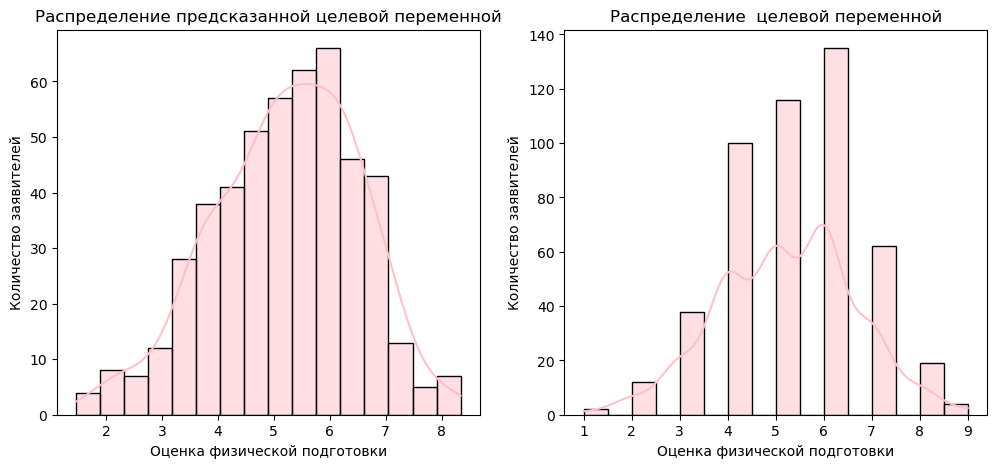

In [19]:
figure, axis = plt.subplots(1, 2, figsize=[12,5])

axis[0].set(title='Распределение предсказанной целевой переменной', xlabel='Оценка физической подготовки', ylabel='Количество заявителей')
axis[1].set(title='Распределение  целевой переменной', xlabel='Оценка физической подготовки', ylabel='Количество заявителей')

sns.histplot(y_pred_6, kde=True, color='pink', ax=axis[0])
sns.histplot(y_6, kde=True, color='pink', ax=axis[1])

#### Контрольные вопросы
1. Что называют глубокой нейронной сетью?

Глубокая нейронная сеть - модель машинного обучения, в которой содержится более 1 скрытого слоя, это модели нейронных сетей, которые имеют более чем один слой нейронов, каждый из которых обрабатывает информацию на определенном уровне абстракции. Слои могут содержать множество нейронов, которые связаны между собой взвешенными связями.

2. Что такое архитектура нейронной сети?

Архитектура нейронной сети (НС) - это структура и набор алгоритмов, используемых для создания и обучения искусственных интеллектуальных систем, способных к автоматическому анализу и интерпретации больших объёмов данных. НС состоит из множества связанных нейронов, которые могут обрабатывать данные параллельно и выдавать результаты. Каждый нейрон в сети может получать входные значения от других нейронов и выдавать своё собственное значение в качестве выхода.

3. Как количество нейронов и слоев влияет на качество моделирования?

Чем больше количество слоев и нейронов, тем точнее сработает модель. Однако есть оптимальное значение для конкретного датасета. Эти значения необходимо подбирать.

4. Как нейронная сеть решает задачи множественной классификации?

В общем виде можно сказать, что в сети с одним скрытым слоем вектор, соответствующий входному образцу, преобразуется скрытым слоем в некоторое новое пространство, которое может иметь другую размерность, а затем гиперплоскости, соответствующие нейронам выходного слоя, разделяют его на классы. Таким образом сеть распознает не только характеристики исходных данных, но и "характеристики характеристик", сформированные скрытым слоем.

5. В каких случаях следует применять перцептрон?
